### DATA620 Assignment 6: 2-Mode Networks

Keith Folsom
Octoboer 9, 2017

This assignment uses the Davis Southern Club Women which is a dataset that shows a simple 2-mode network:  the attendance of 18 Southern Women at 14 social events.

Dataset:  http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat  
Networkx: https://networkx.github.io/documentation/networkx-1.10/examples/algorithms/davis_club.html


What can be inferred about the relationships between (1) the women, and (2) the social events?  

__Video Overview:__  https://drive.google.com/open?id=0B7Ju9A4G2Qo2RVNMSU5HbTh2MFk
        

### Load the necessary packages

In [444]:
"""
Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).

"""
import networkx as nx
import networkx.algorithms.bipartite as bipartite
from networkx.algorithms import components
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 15)

import math
import operator
import pandas as pd
import seaborn as sns

# https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.bipartite.html

### Create the bipartite graph

In [445]:
G = nx.davis_southern_women_graph()

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 89
Average degree:   5.5625


In [446]:
print("Is bipartite = {} \
       Is Connected = {}".format(nx.is_bipartite(G), nx.is_connected(G)))

Is bipartite = True        Is Connected = True


In [447]:
## One set of nodes for each part of the bipartite graph.
## Returns the women as the top set of nodes; clubs as the bottom

# Can also be done this way 
#women = G.graph['top']
#clubs = G.graph['bottom']

women, clubs = nx.bipartite.sets(G)

In [482]:
# View the Women nodes
women, len(women)

({'Brenda Rogers',
  'Charlotte McDowd',
  'Dorothy Murchison',
  'Eleanor Nye',
  'Evelyn Jefferson',
  'Flora Price',
  'Frances Anderson',
  'Helen Lloyd',
  'Katherina Rogers',
  'Laura Mandeville',
  'Myra Liddel',
  'Nora Fayette',
  'Olivia Carleton',
  'Pearl Oglethorpe',
  'Ruth DeSand',
  'Sylvia Avondale',
  'Theresa Anderson',
  'Verne Sanderson'},
 18)

In [449]:
# let's check the density of the women nodes
nx.bipartite.density(G, women)

0.3531746031746032

In [483]:
# View the Club nodes
clubs, len(clubs)

({'E1',
  'E10',
  'E11',
  'E12',
  'E13',
  'E14',
  'E2',
  'E3',
  'E4',
  'E5',
  'E6',
  'E7',
  'E8',
  'E9'},
 14)

### Visualize the Southern Club Women 2-Mode Network

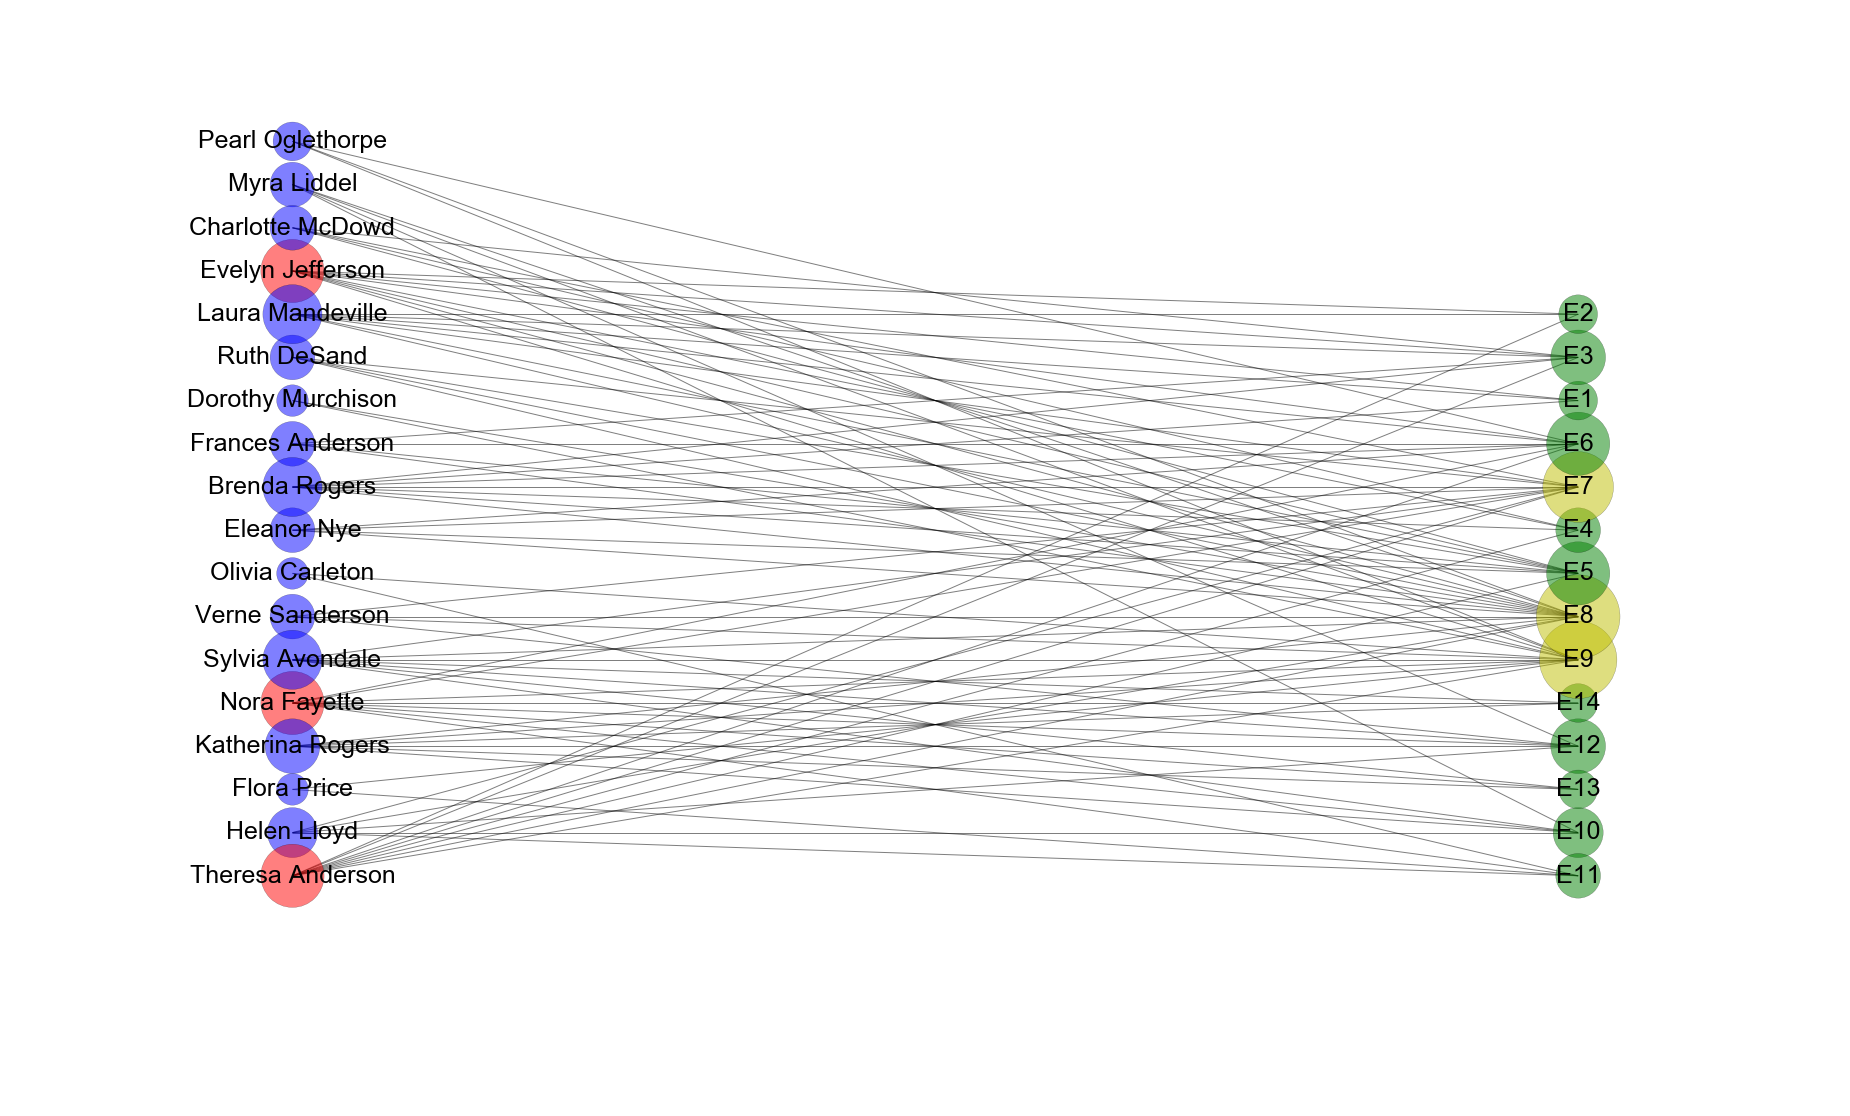

In [451]:
colors=[]

for n, d in G.nodes(data=True):
    if d['bipartite']==1:    # bipartite = 1 indicates the clubs
        if G.degree(n) > 9:
            colors.append('y')   
        else: 
            colors.append('g')
    else:                      # bipartite = 0 indicates the women                               
        if G.degree(n) > 7: 
            colors.append('r')
        else:
            colors.append('b')  

# The logic to position the graph below is taken from this stackoverflow answer
# https://stackoverflow.com/questions/35392342/how-to-change-colours-of-nodes-and-edges-of-bipartite-graph-in-networkx

pos = dict()
pos.update((n, (0, i*10)) for i, n in enumerate(women))
pos.update((n, (0.5, i*10)) for i, n in enumerate(clubs))

nx.draw(G, pos=pos, 
        with_labels=True, 
        edge_color='black', 
        node_color=colors, 
        vmin=1.0, vmax=5.0, 
        alpha=.5, font_size=25,  
        node_size=[v*500 for v in G.degree().values()]
        ) 

plt.show()


Of the 18 women we see that three have a higher degree than the rest - Theresa Anderson, Nora Fayette, and Evelyne Jefferson.  Their degree is shown below:

In [452]:
# degree for women nodes
for key, value in sorted(G.degree(women).iteritems(), key=lambda (k,v): (v,k),reverse=True):
    print ("{}: Degree = {}".format(key, value))

Theresa Anderson: Degree = 8
Nora Fayette: Degree = 8
Evelyn Jefferson: Degree = 8
Sylvia Avondale: Degree = 7
Laura Mandeville: Degree = 7
Brenda Rogers: Degree = 7
Katherina Rogers: Degree = 6
Helen Lloyd: Degree = 5
Verne Sanderson: Degree = 4
Ruth DeSand: Degree = 4
Myra Liddel: Degree = 4
Frances Anderson: Degree = 4
Eleanor Nye: Degree = 4
Charlotte McDowd: Degree = 4
Pearl Oglethorpe: Degree = 3
Olivia Carleton: Degree = 2
Flora Price: Degree = 2
Dorothy Murchison: Degree = 2


Of the 14 clubs, the clubs E8, E9, and E7 have the highest degrees as shown below.  These three clubs represent the most visited clubs by the women.

In [453]:
# degree for club nodes
for key, value in sorted(G.degree(clubs).iteritems(), key=lambda (k,v): (v,k),reverse=True):
    print ("{}: Degree = {}".format(key, value))

E8: Degree = 14
E9: Degree = 12
E7: Degree = 10
E6: Degree = 8
E5: Degree = 8
E3: Degree = 6
E12: Degree = 6
E10: Degree = 5
E4: Degree = 4
E11: Degree = 4
E2: Degree = 3
E14: Degree = 3
E13: Degree = 3
E1: Degree = 3


### Alternate Visualization using a Spring Layout

Again in this plot we see same central nodes - 1.) __women__: Theresa Anderson, Nora Fayette, and Evelyne Jefferson and 2.) __clubs__: E7, E8, and E9.

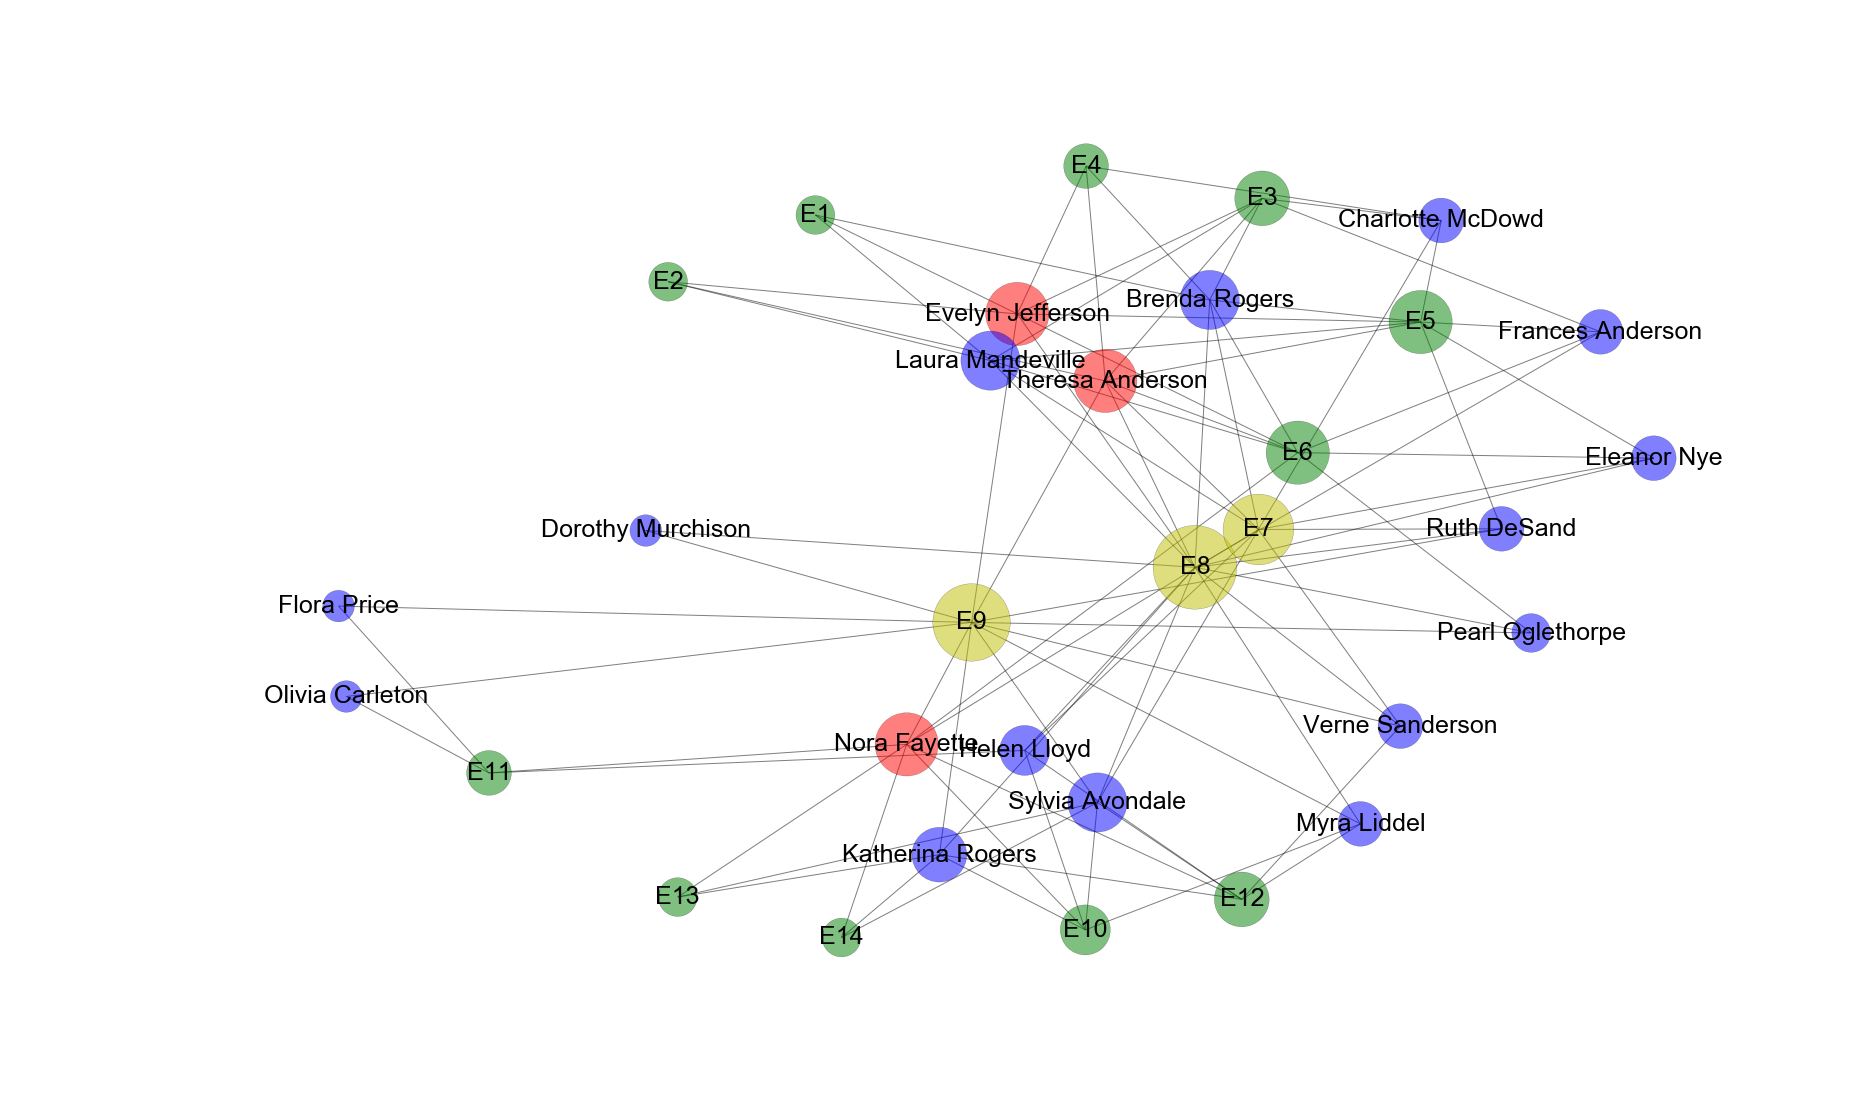

In [454]:
colors=[]

for n, d in G.nodes(data=True):
    if d['bipartite']==1:    # bipartite = 1 indicates the clubs
        if G.degree(n) > 9:
            colors.append('y')   
        else: 
            colors.append('g')
    else:                      # bipartite = 0 indicates the women                               
        if G.degree(n) > 7: 
            colors.append('r')
        else:
            colors.append('b')  

spring_pos = nx.spring_layout(G)
ns = [v*500 for v in G.degree().values()]

nx.draw(G, pos=spring_pos,
        with_labels=True, 
        edge_color='black', 
        node_color=colors, 
        vmin=1.0, vmax=5.0, 
        alpha=.5, font_size=25,  
        node_size=ns
        ) 

plt.show()

### Calculate Centrality Measures

In [455]:
# Compute the degree centrality for nodes in a bipartite network.  Calculate for the women nodes in the bipartite node set.

# Per networkx documentation
# In the bipartite case, the maximum possible degree of a node in a bipartite node set is the number of nodes in the 
# opposite node set.

deg = nx.bipartite.degree_centrality(G, women)

#sorted(deg.items(), key=operator.itemgetter(1), reverse=True)

bet = nx.bipartite.betweenness_centrality(G, women)

clos = nx.bipartite.closeness_centrality(G, women)

centrality_measures = {
    'degree': deg,
    'betweenness': bet,
    'closeness': clos
}
centrality_df = pd.DataFrame(centrality_measures)


centrality_df['node'] = centrality_df.index

# split into clubs and women data frames
clubs_df = centrality_df[centrality_df['node'].isin(list(clubs))]

women_df = centrality_df[centrality_df['node'].isin(list(women))]


### Plot Betweenness vs. Degree Centrality

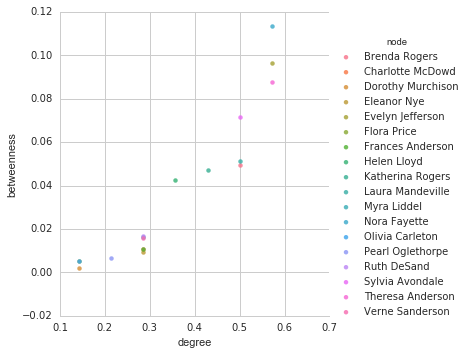

In [456]:
sns.set_style('whitegrid')

sns.lmplot(x='degree', y='betweenness', data=women_df,
           fit_reg=False, # No regression line
           hue='node')   # Color by evolution stage
plt.show()

Nora Fayette, Evelyn Jefferson, and Theresa Anderson appear as a group to themselves as the most central women in the club.

In [457]:
# Nora Fayette's neighbors, in terms of clubs 
nb1 = G.neighbors('Nora Fayette') 
nb1 

['E11', 'E10', 'E13', 'E12', 'E14', 'E9', 'E7', 'E6']

In [458]:
# Evelyn Jefferson's neighbors, in terms of clubs 
nb2 = G.neighbors('Evelyn Jefferson') 
nb2

['E9', 'E8', 'E5', 'E4', 'E6', 'E1', 'E3', 'E2']

In [459]:
# Theresa Anderson's neighbors, in terms of clubs 
nb3 = G.neighbors('Theresa Anderson') 
nb3

['E9', 'E8', 'E5', 'E4', 'E7', 'E6', 'E3', 'E2']

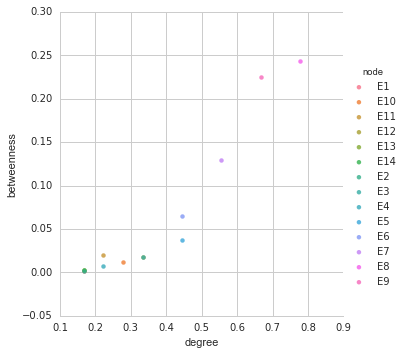

In [460]:
sns.set_style('whitegrid')
sns.lmplot(x='degree', y='betweenness', data=clubs_df,
           fit_reg=False, # No regression line
           hue='node'
          )   # Color by evolution stage
plt.show()

Similarly, we see clubs E9 and E8 at the most central clubs.

In [461]:
# who has attended an event a club E9 
cnb1 = G.neighbors('E9') 

In [462]:
# who has attended an event a club E8
cnb2 = G.neighbors('E8') 

In [463]:
# all women how have attend an event at either
# at 17, it's nearly all the women.
res  = set(cnb1).union(cnb2)
res, len(res)

({'Brenda Rogers',
  'Dorothy Murchison',
  'Eleanor Nye',
  'Evelyn Jefferson',
  'Flora Price',
  'Frances Anderson',
  'Helen Lloyd',
  'Katherina Rogers',
  'Laura Mandeville',
  'Myra Liddel',
  'Nora Fayette',
  'Olivia Carleton',
  'Pearl Oglethorpe',
  'Ruth DeSand',
  'Sylvia Avondale',
  'Theresa Anderson',
  'Verne Sanderson'},
 17)

In [464]:
# Charlotte McDowd is the only woman not to attend an event at E8 or E9
set(list(women)) - set(res) 


{'Charlotte McDowd'}

### Create an affiliation network of women and clubs

Per Networkx documentation this will project bipartite graph onto women nodes keeping number of co-occurence
the degree computed is weighted and counts the total number of shared contacts.

This applies to clubs as well.

In [465]:
W = bipartite.weighted_projected_graph(G, women, ratio=False)

C = bipartite.weighted_projected_graph(G, clubs, ratio=False)

In [466]:
print(nx.info(W))

Name: 
Type: Graph
Number of nodes: 18
Number of edges: 139
Average degree:  15.4444


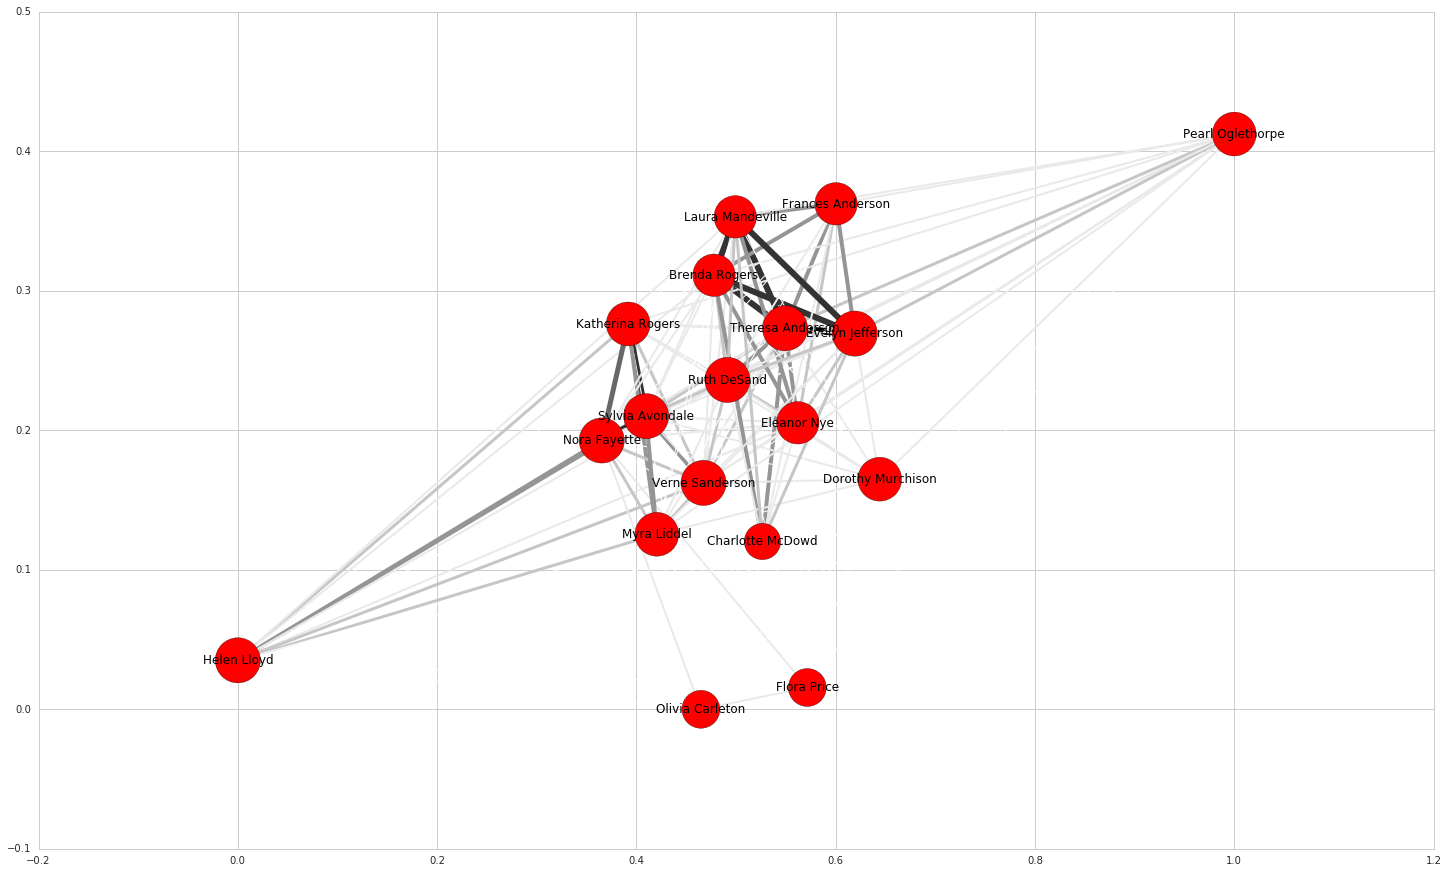

In [467]:
# Let's plot the weighted projected graph using the example provided in the book, SNABook
# Weighted edges based on common clubs

weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
ns = [v*120 for v in W.degree().values()]
nx.draw_networkx(W, width=weights, edge_color=weights, node_size=ns)
plt.show()

In [468]:
print(nx.info(C))

Name: 
Type: Graph
Number of nodes: 14
Number of edges: 66
Average degree:   9.4286


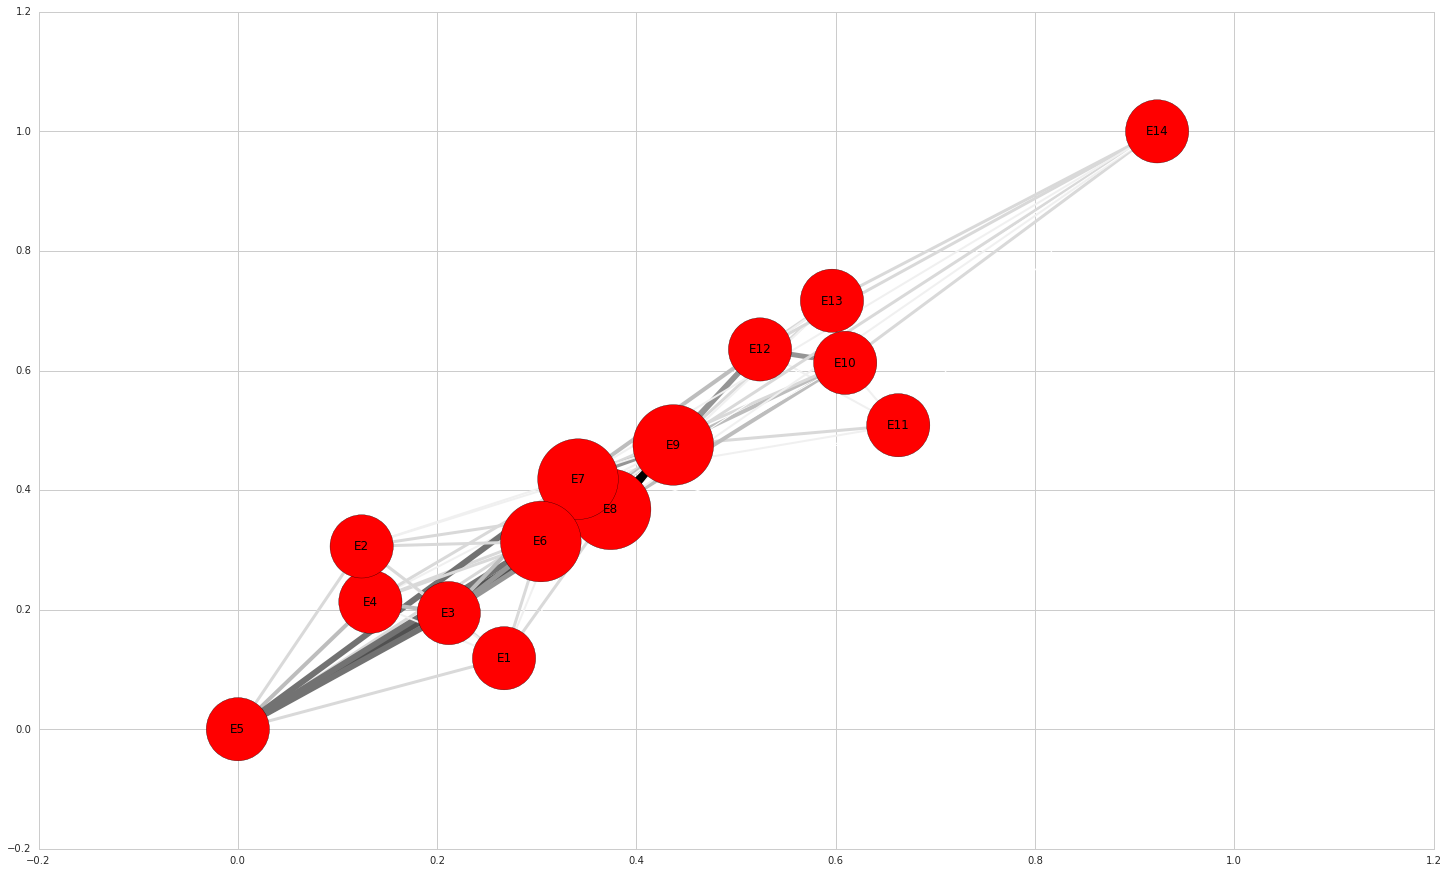

In [469]:
# Let's plot the weighted projected graph using the example provided in the book, SNABook
# Weighted edges based on common clubs

weights = [edata['weight'] for f,t,edata in C.edges(data=True)]
ns = [v*500 for v in C.degree().values()]
nx.draw_networkx(C, width=weights, edge_color=weights, node_size=ns)
plt.show()

### Island Analysis

Methods used below are drawn directly from the book Social Network Analysis For Startups.  The approach is to establish a "water level" by examining the edge weights within the network.  Once established, edges with less than the water level weight will be remove, leaving a set of nodes with more activity for further examination.

In [470]:
# Trim edges function is taken directly from SNABook

def trim_edges(g, weight=1):
    """
    Remove edges with weights less then a threshold parameter ("weight")
    """
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2


def island_method(g, iterations = 5):
    # Iterates through the graph removing edges and returning the number of edges removed and
    #  the trimmed graph
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [471]:
## Apply Island Analysis on the women nodes
cc = list(nx.connected_component_subgraphs(W))[0]
islands = island_method(cc)

print 'Weight  Women  Groups'
for i in islands:
    print(' %d      %2d      %d' 
          %(i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1])))))

Weight  Women  Groups
 1      18      1
 2      15      1
 3      14      2
 4       7      2
 5       7      2
 6       2      1


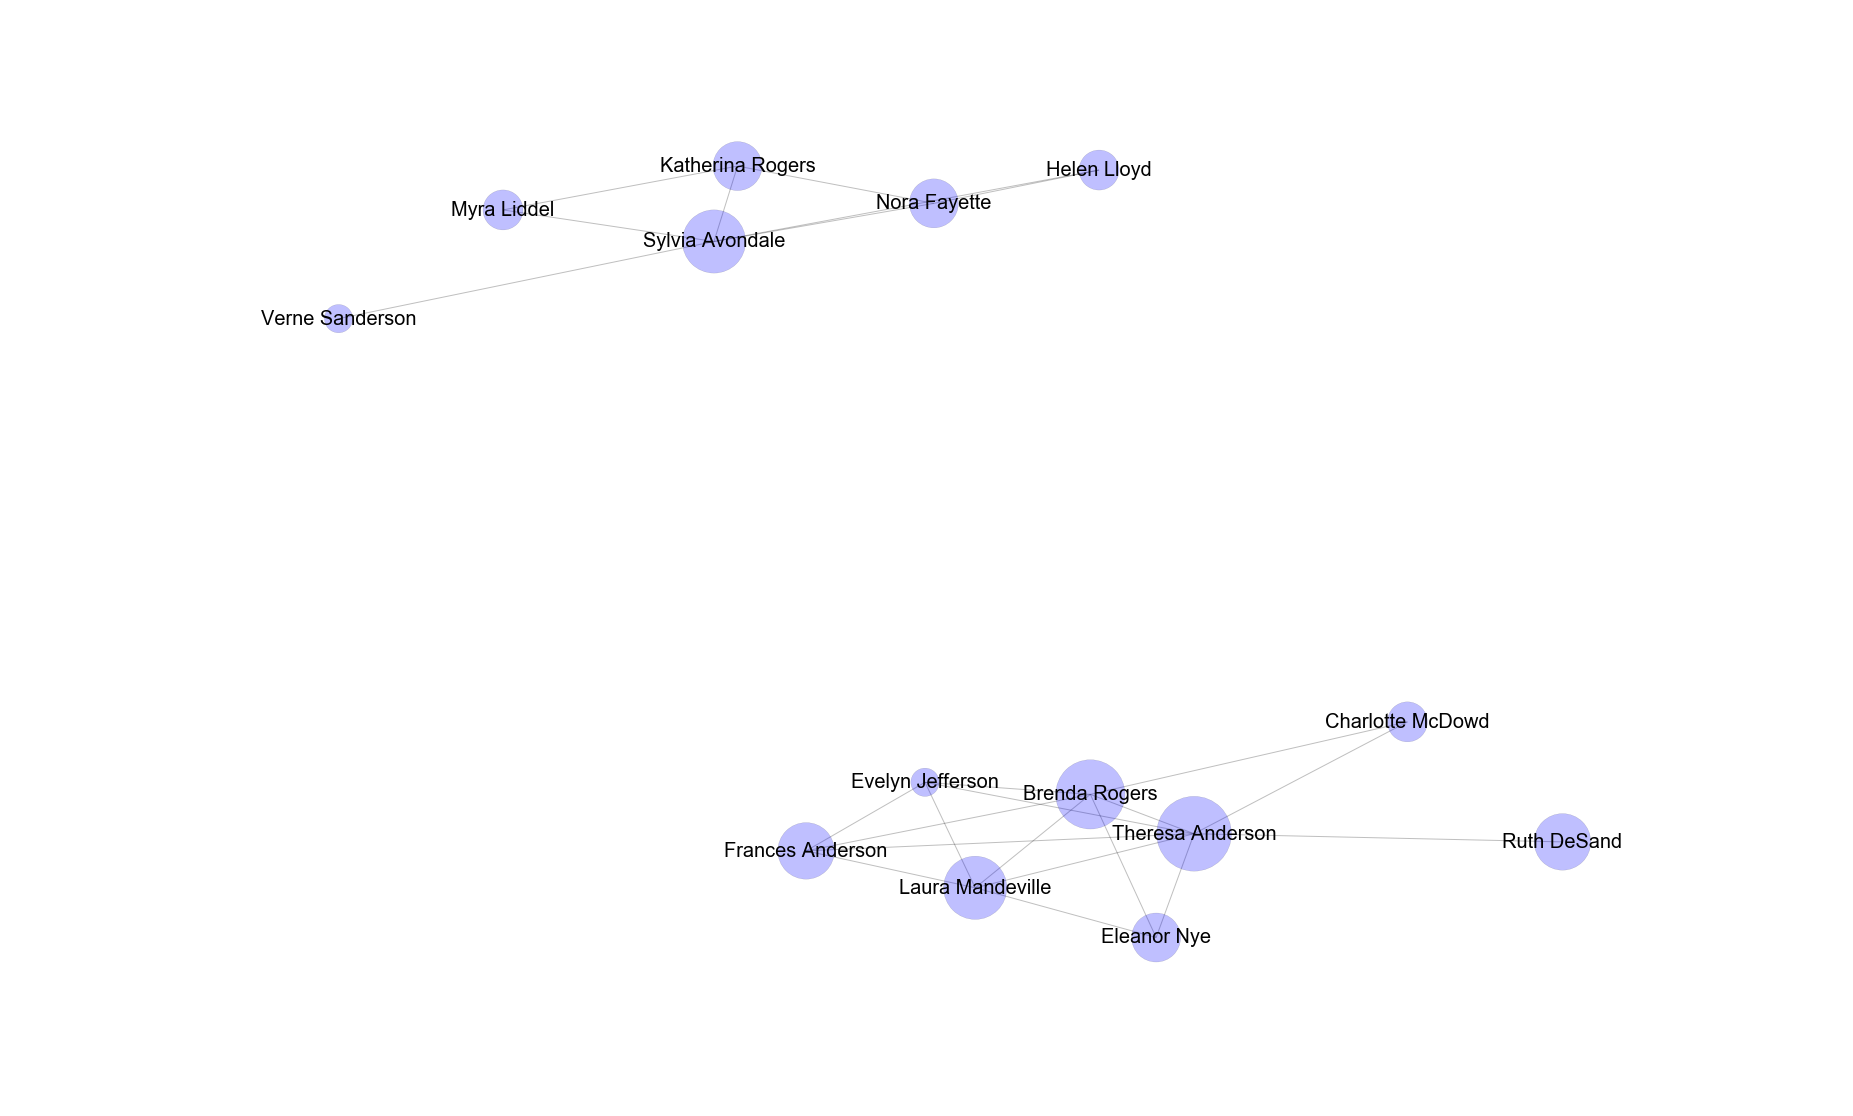

In [472]:
# apply a minimum weight 3 water level
wsub3 = trim_edges(W, 3)

nx.draw(wc, node_size=[v*800 for v in wsub3.degree().values()], with_labels=True, node_color='b', alpha=.25, font_size=20)

In [473]:
# increase the water level to weight 4
wsub4 = trim_edges(W, 4)

In [474]:
# who did we lose?

set(wsub3) - set(wsub4)

{'Charlotte McDowd',
 'Eleanor Nye',
 'Frances Anderson',
 'Helen Lloyd',
 'Myra Liddel',
 'Ruth DeSand',
 'Verne Sanderson'}

In [475]:
## Island Analysis on the club graph nodes
cc = list(nx.connected_component_subgraphs(C))[0]
islands = island_method(cc)

print 'Weight  Club  Groups'
for i in islands:
    print(' %d      %2d      %d' 
          %(i[0], len(i[1]), len(list(nx.connected_component_subgraphs(i[1])))))

Weight  Club  Groups
 1      14      1
 2      14      1
 3       9      1
 4       8      1
 5       6      1
 6       5      1
 7       3      1
 8       2      1


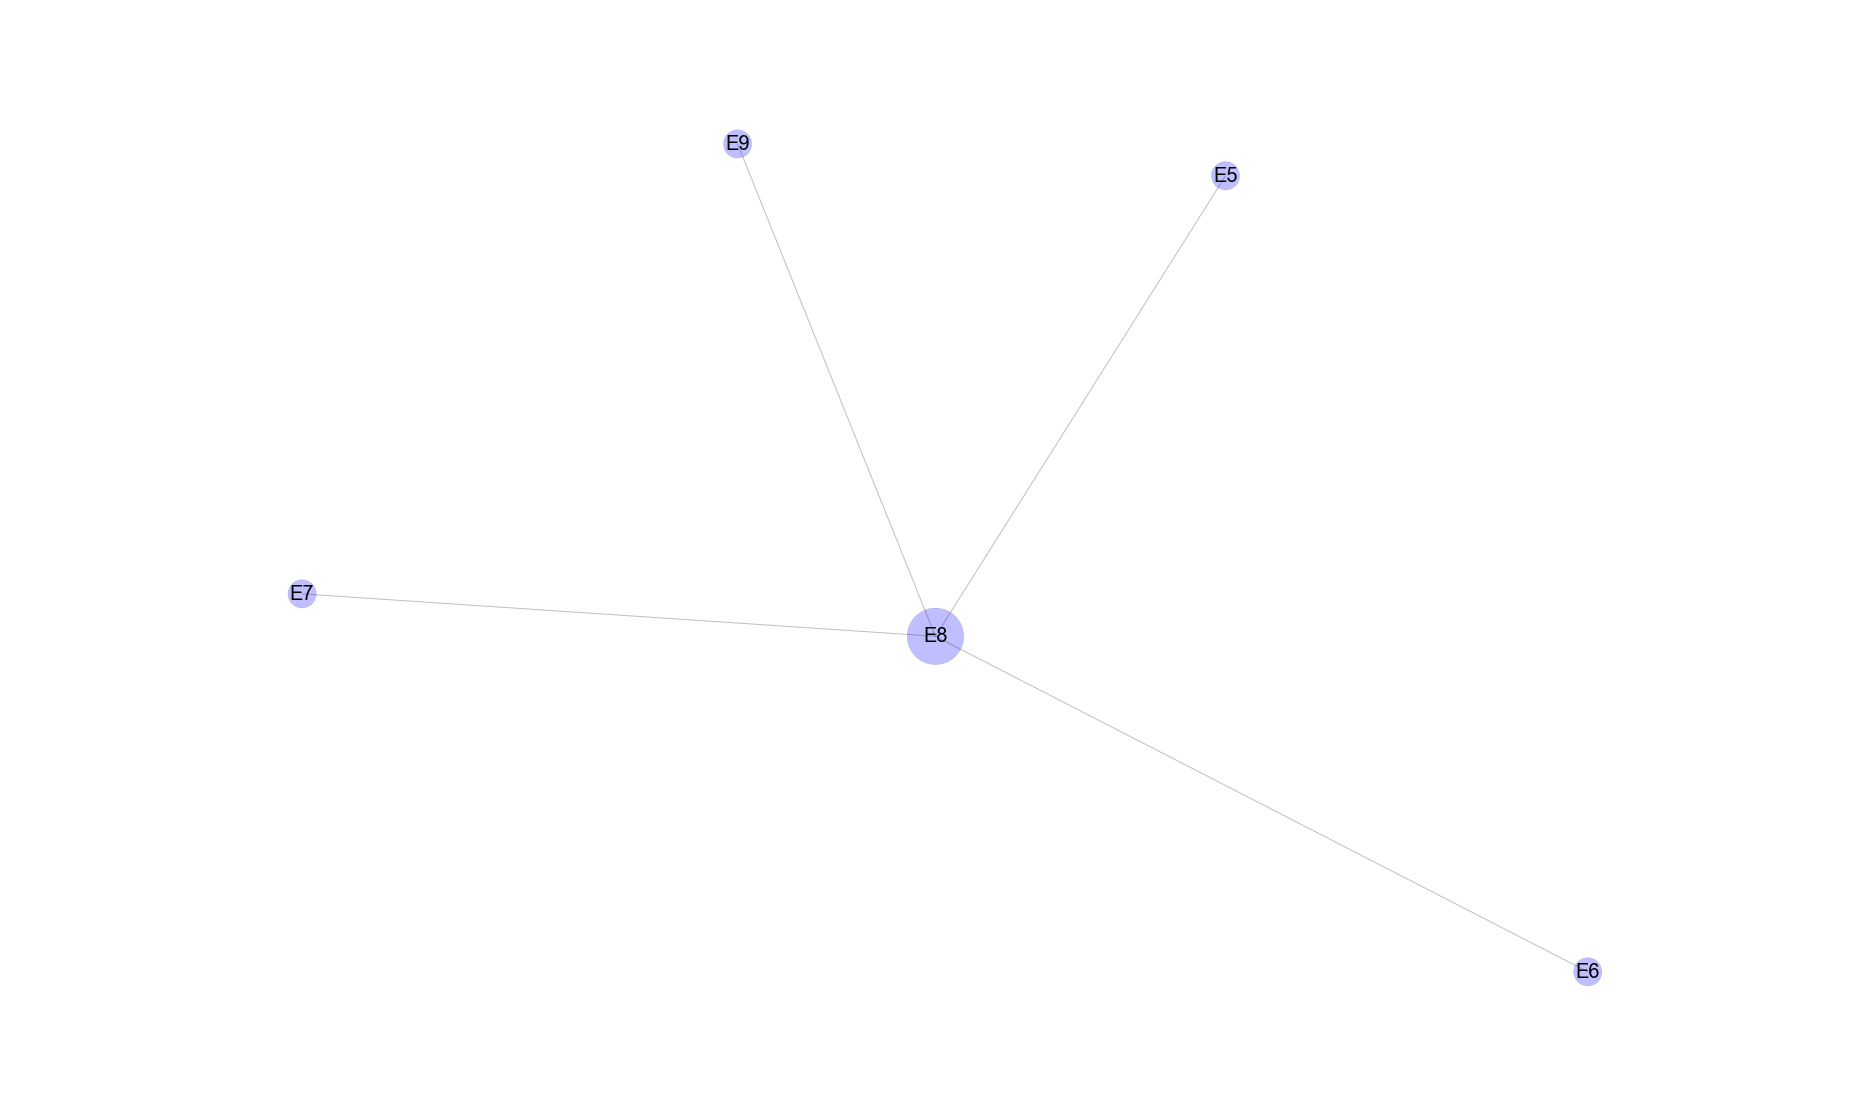

In [476]:
csub6 = trim_edges(C, 6)
nx.draw(csub6, node_size=[v*800 for v in csub6.degree().values()], with_labels=True, node_color='b', alpha=.25, font_size=20)

### Cliques 

A clique is a group where every node is directly connected to each other.

In [477]:
cliques = nx.graph_number_of_cliques(W)
cliques

3

In [478]:
# show the cliques
list(nx.find_cliques(W))

[['Theresa Anderson',
  'Nora Fayette',
  'Helen Lloyd',
  'Sylvia Avondale',
  'Evelyn Jefferson',
  'Ruth DeSand',
  'Verne Sanderson',
  'Charlotte McDowd',
  'Laura Mandeville',
  'Frances Anderson',
  'Eleanor Nye',
  'Brenda Rogers'],
 ['Theresa Anderson',
  'Nora Fayette',
  'Helen Lloyd',
  'Sylvia Avondale',
  'Evelyn Jefferson',
  'Ruth DeSand',
  'Verne Sanderson',
  'Pearl Oglethorpe',
  'Katherina Rogers',
  'Myra Liddel',
  'Dorothy Murchison',
  'Olivia Carleton',
  'Flora Price'],
 ['Theresa Anderson',
  'Nora Fayette',
  'Helen Lloyd',
  'Sylvia Avondale',
  'Evelyn Jefferson',
  'Ruth DeSand',
  'Verne Sanderson',
  'Pearl Oglethorpe',
  'Katherina Rogers',
  'Myra Liddel',
  'Dorothy Murchison',
  'Eleanor Nye',
  'Laura Mandeville',
  'Frances Anderson',
  'Brenda Rogers']]

### Clustering

In [479]:
clustering = bipartite.clustering(G, women)
sorted(clustering.items(), key=operator.itemgetter(1), reverse=True)

[('Theresa Anderson', 0.3718188674071027),
 ('Brenda Rogers', 0.36491249491249483),
 ('Ruth DeSand', 0.36435574229691875),
 ('Eleanor Nye', 0.3603174603174603),
 ('Laura Mandeville', 0.3518172568172568),
 ('Verne Sanderson', 0.3488328664799254),
 ('Pearl Oglethorpe', 0.3323412698412699),
 ('Myra Liddel', 0.32440476190476186),
 ('Sylvia Avondale', 0.322751921281333),
 ('Evelyn Jefferson', 0.3179433311786252),
 ('Frances Anderson', 0.31481721981721983),
 ('Dorothy Murchison', 0.30500992063492066),
 ('Katherina Rogers', 0.2974950396825397),
 ('Charlotte McDowd', 0.29441164895710353),
 ('Helen Lloyd', 0.2616989219930397),
 ('Nora Fayette', 0.26057667822373703),
 ('Flora Price', 0.2575066137566138),
 ('Olivia Carleton', 0.25750661375661377)]

In [480]:
clustering2 = bipartite.clustering(G, clubs)
sorted(clustering2.items(), key=operator.itemgetter(1), reverse=True)

[('E3', 0.47048611111111116),
 ('E5', 0.4678921568627451),
 ('E10', 0.4033424908424909),
 ('E12', 0.40144230769230776),
 ('E13', 0.3664772727272727),
 ('E14', 0.3664772727272727),
 ('E4', 0.3644480519480519),
 ('E2', 0.3374937562437562),
 ('E1', 0.32719155844155845),
 ('E8', 0.2961646196940315),
 ('E6', 0.2916412647181878),
 ('E7', 0.2893897203851955),
 ('E9', 0.24355452240067624),
 ('E11', 0.1770270171005465)]

In [481]:
avg_clustering = bipartite.average_clustering(G, women)
avg_clustering


0.3171399238477187